In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from math import exp
import keras
from random import seed
from random import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Dataset**

In [32]:
from keras.datasets import cifar10

**Description**

With the given data, we attempt to run the data through different models.

First step across each model is to preprocess the data.
- MLP model requires reshaping the input data to fit the expected input shape of 3072.
- Asides from the initial hot encoding of output train and validation data, the CNNs are good.

Next, we compile each model as described in the question with the following settings: 

**Loss function** — calculates the difference between the output and the target variable. It measures the accuracy of the model during training and we want to minimize this function. In this example, we chose the sparse_categorical_crossentropy loss function because our targets are not one-hot encoded. Its values are integers.

**Optimizer** — how the model is updated and is based on the data and the loss function. We use the Adam optimizer because it's shown to be effective and efficient

**Metrics** — monitors the training and testing steps. Accuracy is a common metric and it measures the fraction of images that are correctly classified.

**Data Preprocessing**

In [46]:
# Data Splitting 

from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

# Readily divides into training and testing sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)


x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.2, random_state=0)

# Normalize data
x_train = x_train / 255.0
x_val = x_val / 255.0

# One hot encoding output labels of train and val sets
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)

**MLP**

In [47]:
from keras.models import Sequential
from keras.layers import Dense
from keras import activations
from tensorflow.keras.optimizers import Adam
from keras.layers import Flatten
import time

# Data Reshaping to fit into model expected input shape
x_train_mlp = x_train.reshape(-1, 3072)
x_val_mlp = x_val.reshape(-1, 3072)
x_test_mlp = x_test.reshape(-1, 3072)

mlp_model = Sequential()
mlp_model.add(Dense(512, activation='sigmoid', input_shape=(3072, )))
mlp_model.add(Dense(512, activation='sigmoid'))
mlp_model.add(Dense(10,  activation='softmax'))
mlp_model.compile(loss='categorical_crossentropy', 
            optimizer=Adam(), metrics=['accuracy'])


**Training MLP**

In [48]:
# Declaring start time and end time to monitor train time

start_time = time.time()
mlp_train_model = mlp_model.fit(x_train_mlp, y_train, epochs = 5, batch_size = 32, validation_data=(x_val_mlp, y_val))
end_time = time.time()

print("--- %s time to train (seconds) for 10 epochs ---" % (end_time - start_time))

Epoch 1/5
313/313 [==============================] - 11s 32ms/step - loss: 2.1885 - accuracy: 0.1879 - val_loss: 2.0356 - val_accuracy: 0.2720
Epoch 2/5
313/313 [==============================] - 10s 31ms/step - loss: 1.9291 - accuracy: 0.3001 - val_loss: 1.9445 - val_accuracy: 0.3109
Epoch 3/5
313/313 [==============================] - 9s 30ms/step - loss: 1.8775 - accuracy: 0.3276 - val_loss: 1.8327 - val_accuracy: 0.3348
Epoch 4/5
313/313 [==============================] - 9s 30ms/step - loss: 1.8023 - accuracy: 0.3507 - val_loss: 1.8132 - val_accuracy: 0.3334
Epoch 5/5
313/313 [==============================] - 10s 31ms/step - loss: 1.7496 - accuracy: 0.3645 - val_loss: 1.7592 - val_accuracy: 0.3751
--- 82.6186797618866 time to train (seconds) for 10 epochs ---


In [49]:
# Training Accuracy and Loss
score_mlp_train = mlp_model.evaluate(x_train_mlp, y_train, verbose=0)
print('MLP Training Accuracy:', score_mlp_train[1])
print('MLP Training Loss:', score_mlp_train[0])

# Validation Accuracy and Loss
score_mlp_val = mlp_model.evaluate(x_val_mlp, y_val, verbose=0)
print('MLP Validation Accuracy:', score_mlp_val[1])
print('MLP Validation Loss:', score_mlp_val[0])

MLP Training Accuracy: 0.3970000147819519
MLP Training Loss: 1.7081072330474854
MLP Validation Accuracy: 0.3750999867916107
MLP Validation Loss: 1.7591849565505981


**CNN-1**

In [50]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend
from tensorflow.keras.optimizers import Adam, SGD


cnn1_model = Sequential()
cnn1_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',
                input_shape=(32, 32, 3)))
cnn1_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn1_model.add(Flatten())
cnn1_model.add(Dense(512, activation='sigmoid'))
cnn1_model.add(Dense(512, activation='sigmoid'))
cnn1_model.add(Dense(10, activation='softmax'))

cnn1_model.compile(loss='categorical_crossentropy', optimizer=Adam(),
              metrics=['accuracy'])

**Training CNN-1**

In [57]:
start_time = time.time()
cnn1_train_model = cnn1_model.fit(x_train, y_train, verbose = 1, epochs = 5, batch_size = 32, validation_data=(x_val, y_val))
end_time = time.time()

print("--- %s time to train (seconds) for 10 epochs ---" % (end_time - start_time))

313/313 [==============================] - 188s 601ms/step - loss: 0.9440 - accuracy: 0.6687 - val_loss: 1.3844 - val_accuracy: 0.5221
--- 202.04168438911438 time to train (seconds) for 10 epochs ---


In [60]:
# Training Accuracy and Loss
score_cnn1_train = cnn1_model.evaluate(x_train, y_train, verbose=0)
print('CNN1 Train Accuracy:', score_cnn1_train[1])
print('CNN1 Train Loss:', score_cnn1_train[0])

# Validation Accuracy and Loss
score_cnn1_val = cnn1_model.evaluate(x_val, y_val, verbose=0)
print('CNN1 Val Accuracy:', score_cnn1_val[1])
print('CNN1 Val Loss:', score_cnn1_val[0])

MLP Test Accuracy: 0.7936999797821045
MLP Test Loss: 0.6548687219619751
MLP Test Accuracy: 0.5220999717712402
MLP Test Loss: 1.3844047784805298


**CNN-2**

In [70]:
cnn2_model = Sequential()
cnn2_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',
                input_shape=(32, 32, 3)))
cnn2_model.add(MaxPooling2D((2, 2)))
cnn2_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn2_model.add(MaxPooling2D((2, 2)))
cnn2_model.add(Flatten())
cnn2_model.add(Dense(512, activation='sigmoid'))
cnn2_model.add(Dropout(0.2))
cnn2_model.add(Dense(512, activation='sigmoid'))
cnn2_model.add(Dropout(0.2))
cnn2_model.add(Dense(10, activation='softmax'))

cnn2_model.compile(loss='categorical_crossentropy', optimizer=Adam(),
              metrics=['accuracy'])

**Training CNN-2**

In [71]:
start_time = time.time()
cnn2_train_model = cnn2_model.fit(x_train, y_train, verbose = 1, epochs = 5, batch_size = 32, validation_data=(x_val, y_val))
end_time = time.time()

print("--- %s time to train (seconds) for 10 epochs ---" % (end_time - start_time))

313/313 [==============================] - 48s 148ms/step - loss: 2.1976 - accuracy: 0.1870 - val_loss: 1.6526 - val_accuracy: 0.3974
--- 83.51143050193787 time to train (seconds) for 10 epochs ---


In [74]:
# Training Accuracy and Loss
score_cnn2_train = cnn2_model.evaluate(x_train, y_train, verbose=0)
print('CNN2 Train Accuracy:', score_cnn2_train[1])
print('CNN2 Train Loss:', score_cnn2_train[0])

# Validation Accuracy and Loss
score_cnn2_val = cnn2_model.evaluate(x_val, y_val, verbose=0)
print('CNN2 Val Accuracy:', score_cnn2_val[1])
print('CNN2 Val Loss:', score_cnn2_val[0])

CNN2 Train Accuracy: 0.4023999869823456
CNN2 Train Loss: 1.6383135318756104
CNN2 Val Accuracy: 0.3973749876022339
CNN2 Val Loss: 1.652585744857788


**MLP New Models**

In [66]:
# Model 2
# Add Extra layer

mlp_model_2 = Sequential()
mlp_model_2.add(Dense(512, activation='sigmoid', input_shape=(3072, )))
mlp_model_2.add(Dense(512, activation='sigmoid'))
mlp_model_2.add(Dense(512, activation='sigmoid'))
mlp_model_2.add(Dense(10,  activation='softmax'))
mlp_model_2.compile(loss='categorical_crossentropy', 
            optimizer=Adam(), metrics=['accuracy'])

# Declaring start time and end time to monitor train time

start_time = time.time()
mlp_train_model_2 = mlp_model_2.fit(x_train_mlp, y_train, epochs = 5, batch_size = 32, validation_data=(x_val_mlp, y_val))
end_time = time.time()

print("--- %s time to train (seconds) for 10 epochs ---" % (end_time - start_time))


# Training Accuracy and Loss
score_mlp_train_2 = mlp_model.evaluate(x_train_mlp, y_train, verbose=0)
print('MLP2 Train Accuracy:', score_mlp_train_2[1])
print('MLP2 Train Loss:', score_mlp_train_2[0])

# Validation Accuracy and Loss
score_mlp_val_2 = mlp_model.evaluate(x_val_mlp, y_val, verbose=0)
print('MLP2 Val Accuracy:', score_mlp_val_2[1])
print('MLP2 Val Loss:', score_mlp_val_2[0])

# Model 3
# Change Neurons and add Extra layer

mlp_model_3 = Sequential()
mlp_model_3.add(Dense(1024, activation='sigmoid', input_shape=(3072, )))
mlp_model_3.add(Dense(1024, activation='sigmoid'))
mlp_model_3.add(Dense(1024, activation='sigmoid'))
mlp_model_3.add(Dense(10,  activation='softmax'))
mlp_model_3.compile(loss='categorical_crossentropy', 
            optimizer=Adam(), metrics=['accuracy'])

# Declaring start time and end time to monitor train time

start_time = time.time()
mlp_train_model_3 = mlp_model_3.fit(x_train_mlp, y_train, epochs = 5, batch_size = 32, validation_data=(x_val_mlp, y_val))
end_time = time.time()

print("--- %s time to train (seconds) for 10 epochs ---" % (end_time - start_time))


# Training Accuracy and Loss
score_mlp_train_3 = mlp_model.evaluate(x_train_mlp, y_train, verbose=0)
print('MLP3 Train Accuracy:', score_mlp_train_3[1])
print('MLP3 Train Loss:', score_mlp_train_3[0])

# Validation Accuracy and Loss
score_mlp_val_3 = mlp_model.evaluate(x_val_mlp, y_val, verbose=0)
print('MLP3 Val Accuracy:', score_mlp_val_3[1])
print('MLP3 Val Loss:', score_mlp_val_3[0])


Epoch 1/5
313/313 [==============================] - 13s 38ms/step - loss: 2.2529 - accuracy: 0.1499 - val_loss: 1.9744 - val_accuracy: 0.2496
Epoch 2/5
313/313 [==============================] - 11s 36ms/step - loss: 1.9646 - accuracy: 0.2545 - val_loss: 1.9470 - val_accuracy: 0.2768
Epoch 3/5
313/313 [==============================] - 11s 35ms/step - loss: 1.9380 - accuracy: 0.2818 - val_loss: 1.8795 - val_accuracy: 0.3031
Epoch 4/5
313/313 [==============================] - 11s 36ms/step - loss: 1.8639 - accuracy: 0.3194 - val_loss: 1.8876 - val_accuracy: 0.2869
Epoch 5/5
313/313 [==============================] - 11s 36ms/step - loss: 1.8483 - accuracy: 0.3268 - val_loss: 1.8583 - val_accuracy: 0.3220
--- 57.90013122558594 time to train (seconds) for 10 epochs ---
MLP2 Train Accuracy: 0.3970000147819519
MLP2 Train Loss: 1.7081072330474854
MLP2 Val Accuracy: 0.3750999867916107
MLP2 Val Loss: 1.7591849565505981
Epoch 1/5
313/313 [==============================] - 28s 87ms/step - loss

**Comparing MLP New Models**

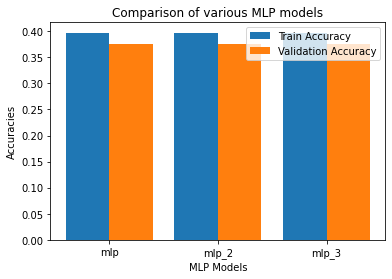

In [67]:
# Comparing accuracies across MLP models
train_accuracies_mlp = [score_mlp_train[1], score_mlp_train_2[1], score_mlp_train_3[1]]
val_accuracies_mlp = [score_mlp_val[1], score_mlp_val_2[1], score_mlp_val_3[1]]

models = ['mlp','mlp_2','mlp_3']
X_axis = np.arange(len(models))
  
plt.bar(X_axis - 0.2, train_accuracies_mlp, 0.4, label = 'Train Accuracy')
plt.bar(X_axis + 0.2, val_accuracies_mlp, 0.4, label = 'Validation Accuracy')
  
plt.xticks(X_axis, models)
plt.xlabel("MLP Models")
plt.ylabel("Accuracies")
plt.title("Comparison of various MLP models")
plt.legend()
plt.show()

From the graph above, we can observe that the accuracies are similar but the first MLP model has the highest train and validation accuracy.
The general low accuracy can be traced to the fact that MLP does not perform well with large image datasets.
The first MLP model is best because of the careful balance of its layers and neurons.

**Comparing CNN vs MLP**

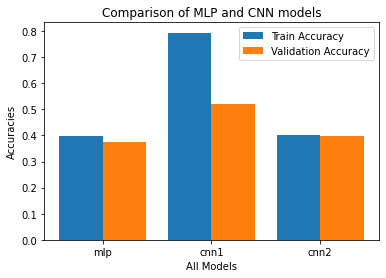

In [75]:
# plotting bar graph for comparison
train_accuracies = [score_mlp_train[1], score_cnn1_train[1], score_cnn2_train[1]]
val_accuracies = [score_mlp_val[1], score_cnn1_val[1], score_cnn2_val[1]]

models = ['mlp','cnn1','cnn2']
X_axis = np.arange(len(models))
  
plt.bar(X_axis - 0.2, train_accuracies, 0.4, label = 'Train Accuracy')
plt.bar(X_axis + 0.2, val_accuracies, 0.4, label = 'Validation Accuracy')
  
plt.xticks(X_axis, models)
plt.xlabel("All Models")
plt.ylabel("Accuracies")
plt.title("Comparison of MLP and CNN models")
plt.legend()
plt.show()

From the graph above, we see that CNN1 performs the best.
This is due to the fact that the model has a careful balance between its layers and the number of neurons and the general fact that CNNs perform well on large image datasets.

**Recommendations**

- **Add Early stopping**: This would ensure that the model doesn't overtrain in cases where improvement gains are minimal.
- **Increase Training Data**: More data increases the robustness of our models.
- **Different Activation Functions**: We could run further tests comparing activation functions and discover functions that provide more accuracies with our data.
- **Dropout**: This involves randomly ignoring neurons during the training phase. This has the effect of reducing our chances of overfitting the model
